## 画出决策边界

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
from sklearn.svm import SVC

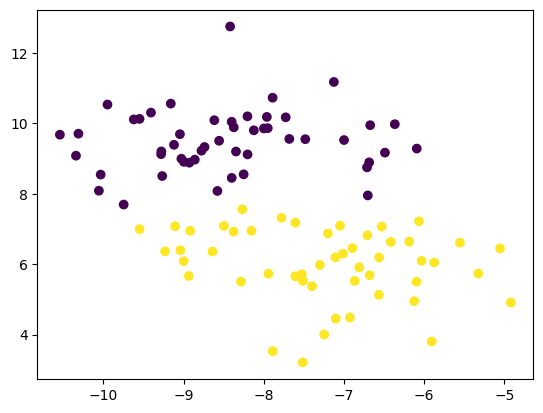

In [4]:
data,target = make_blobs(centers=2)
plt.scatter(data[:,0],data[:,1],c=target)

In [5]:
svc = SVC(kernel='linear',C=0.1)
svc.fit(data,target)

SVC(C=0.1, kernel='linear')

In [9]:
w1,w2 = svc.coef_.ravel()
display(w1,w2)

np.float64(0.1385636164456978)

np.float64(-1.0923509119092336)

In [11]:
b = svc.intercept_[0]
b

np.float64(9.722647252107105)

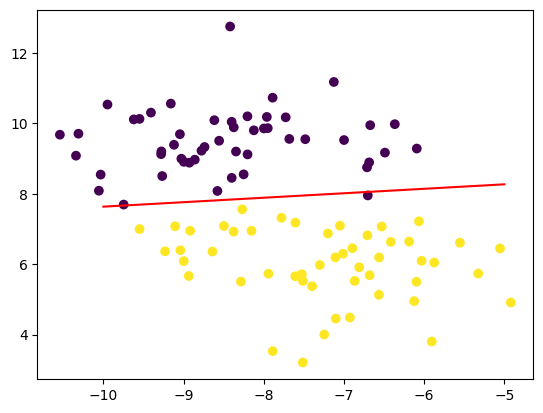

In [24]:
plt.scatter(data[:,0],data[:,1],c=target)
x = np.linspace(-10,-5,100)
y = (-w1/w2) * x - b / w2
plt.plot(x,y,c='r')

In [13]:
vectors = svc.support_vectors_

In [14]:
vectors

array([[ -9.74698643,   7.69158134],
       [ -8.57816711,   8.07838135],
       [ -6.70266611,   7.95118232],
       [-10.05608905,   8.08488022],
       [ -8.39992622,   8.44969104],
       [ -6.68581495,   8.89049018],
       [ -9.26666932,   8.50173947],
       [ -6.71253129,   8.74901055],
       [ -8.25101898,   8.55013801],
       [-10.03410969,   8.54290521],
       [ -7.77908771,   7.31661979],
       [ -6.06466987,   7.21610779],
       [ -9.10504577,   7.07668274],
       [ -8.26931064,   7.55642014],
       [ -8.91796817,   6.94757609],
       [ -9.54830356,   6.99469563],
       [ -7.60619418,   7.17836127],
       [ -8.49701477,   7.08305423],
       [ -8.37607104,   6.92290885],
       [ -7.05011498,   7.09128722]])

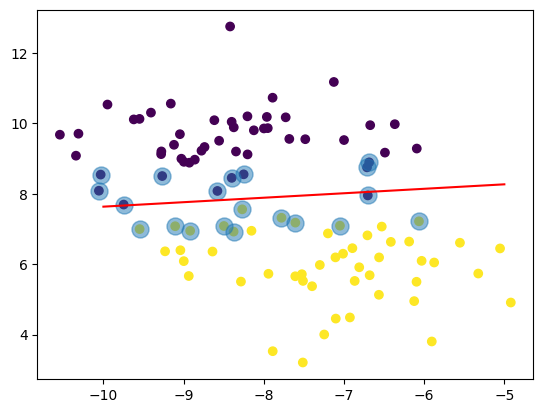

In [25]:
plt.scatter(data[:,0],data[:,1],c=target)
x = np.linspace(-10,-5,100)
y = (-w1/w2)*x-b/w2
plt.plot(x,y,c='r')
plt.scatter(vectors[:,0],vectors[:,1],s=150,alpha=0.5)

In [19]:
vectors

array([[ -9.74698643,   7.69158134],
       [ -8.57816711,   8.07838135],
       [ -6.70266611,   7.95118232],
       [-10.05608905,   8.08488022],
       [ -8.39992622,   8.44969104],
       [ -6.68581495,   8.89049018],
       [ -9.26666932,   8.50173947],
       [ -6.71253129,   8.74901055],
       [ -8.25101898,   8.55013801],
       [-10.03410969,   8.54290521],
       [ -7.77908771,   7.31661979],
       [ -6.06466987,   7.21610779],
       [ -9.10504577,   7.07668274],
       [ -8.26931064,   7.55642014],
       [ -8.91796817,   6.94757609],
       [ -9.54830356,   6.99469563],
       [ -7.60619418,   7.17836127],
       [ -8.49701477,   7.08305423],
       [ -8.37607104,   6.92290885],
       [ -7.05011498,   7.09128722]])

In [20]:
b_up = 8.89049018 - (-w1/w2)*(-6.68581495)
b_up

np.float64(9.738579093790086)

In [21]:
b_down = 6.94757609 - (-w1/w2)*(-8.91796817)
b_down

np.float64(8.078811398645488)

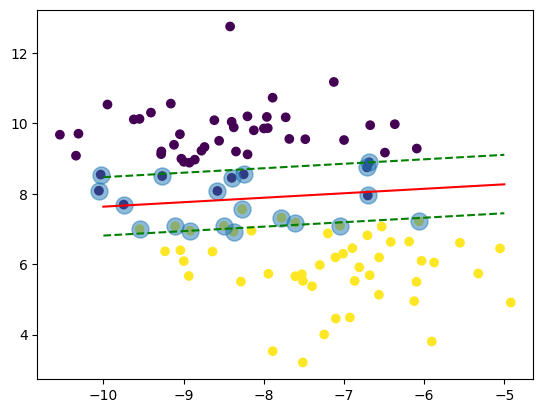

In [26]:
plt.scatter(data[:,0],data[:,1],c=target)
x = np.linspace(-10,-5,100)
y = (-w1/w2)*x - b / w2
plt.plot(x,y,c='r')
plt.scatter(vectors[:,0],vectors[:,1],s=150,alpha=0.5)
x_up = np.linspace(-10,-5,100)
y_up = (-w1/w2)*x_up+b_up
plt.plot(x_up,y_up,ls='--',c='g')

x_down=np.linspace(-10,-5,100)
y_down=(-w1/w2)*x_down+b_down
plt.plot(x_down,y_down,ls='--',c='g')

## SVM分离坐标点

In [28]:
from sklearn.datasets import make_circles

(np.float64(-1.201504954580272),
 np.float64(1.126741019420305),
 np.float64(-1.310364272096015),
 np.float64(1.2212139899466574))

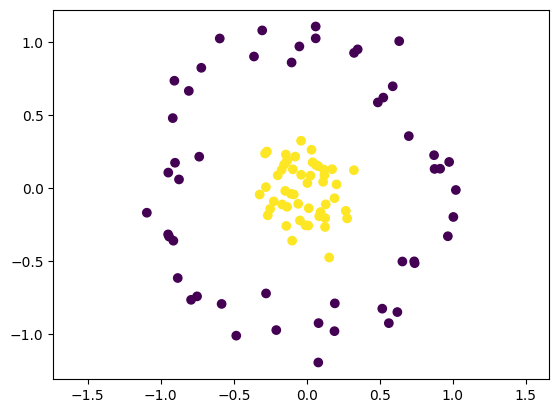

In [29]:
data,target = make_circles(noise=0.1,factor=0.2)
plt.scatter(data[:,0],data[:,1],c=target)
plt.axis('equal')

In [31]:
svc = SVC(kernel='rbf')
svc.fit(data,target)

SVC()

In [32]:
vectors = svc.support_vectors_

(np.float64(-1.201504954580272),
 np.float64(1.126741019420305),
 np.float64(-1.310364272096015),
 np.float64(1.2212139899466574))

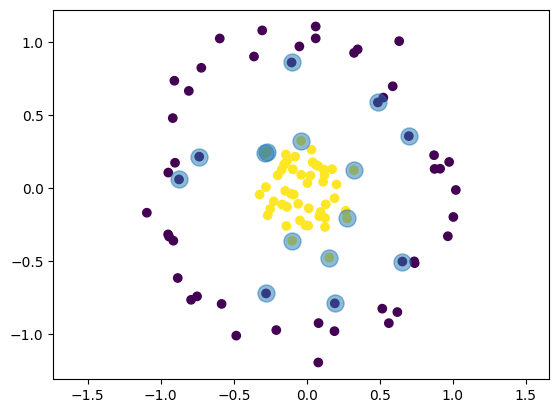

In [33]:
plt.scatter(data[:,0],data[:,1],c=target)
plt.scatter(vectors[:,0],vectors[:,1],s=150,alpha=0.5)
plt.axis('equal')

In [35]:
x = np.linspace(data[:,0].min(),data[:,0].max(),1000)
y = np.linspace(data[:,1].min(),data[:,1].max(),1000)
X,Y = np.meshgrid(x,y)
XY = np.c_[X.ravel(),Y.ravel()]

In [36]:
distance = svc.decision_function(XY)

In [37]:
(distance==0).sum()

np.int64(0)

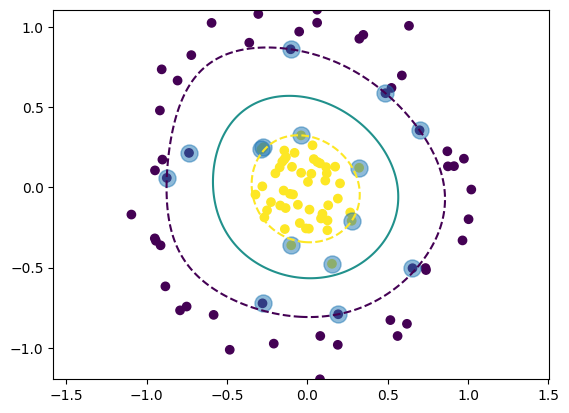

In [38]:
plt.scatter(data[:,0],data[:,1],c=target)
plt.scatter(vectors[:,0],vectors[:,1],s=150,alpha=0.5)
plt.axis('equal')
plt.contour(X,Y,distance.reshape(1000,1000),levels=[-1,0,1],linestyles=['--','-','--'])

## 另外的案例

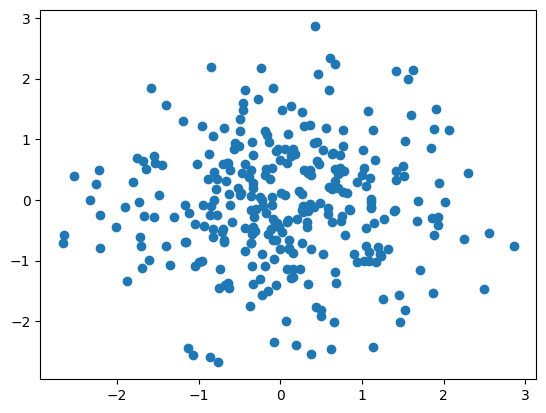

In [39]:
data = np.random.randn(300,2)
plt.scatter(data[:,0],data[:,1])

In [40]:
data[:,0]>0

array([False, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True, False,  True, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
        True, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False, False,

In [41]:
data[:,1]>0

array([ True, False,  True, False, False,  True,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False,  True,  True, False, False, False,  True, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False,  True,  True,  True, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
        True, False,

In [42]:
target = np.logical_xor(data[:,0]>0,data[:,1]>0)

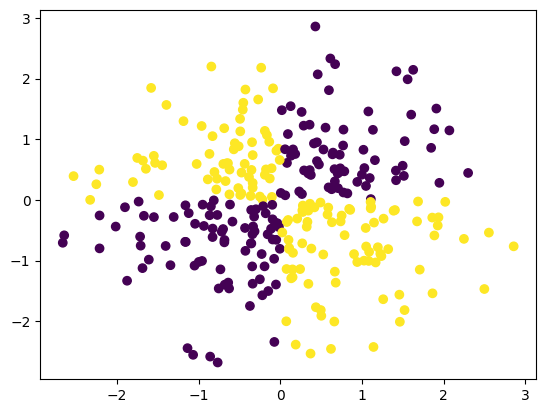

In [43]:
plt.scatter(data[:,0],data[:,1],c=target)

In [44]:
svc=SVC()
svc.fit(data,target)

SVC()

In [47]:
x = np.linspace(data[:,0].min(),data[:,0].max(),1000)
y = np.linspace(data[:,1].min(),data[:,1].max(),1000)
X,Y = np.meshgrid(x,y)
XY = np.c_[X.ravel(),Y.ravel()]

In [48]:
distance=svc.decision_function(XY)

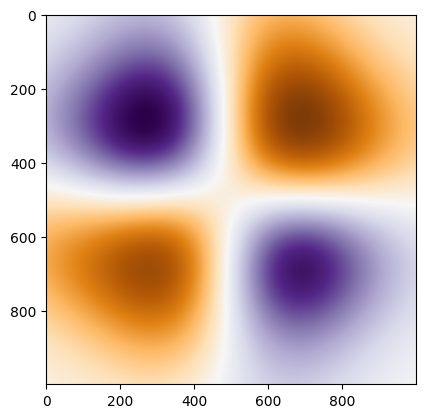

In [50]:
plt.imshow(distance.reshape(1000,1000),cmap = 'PuOr_r')

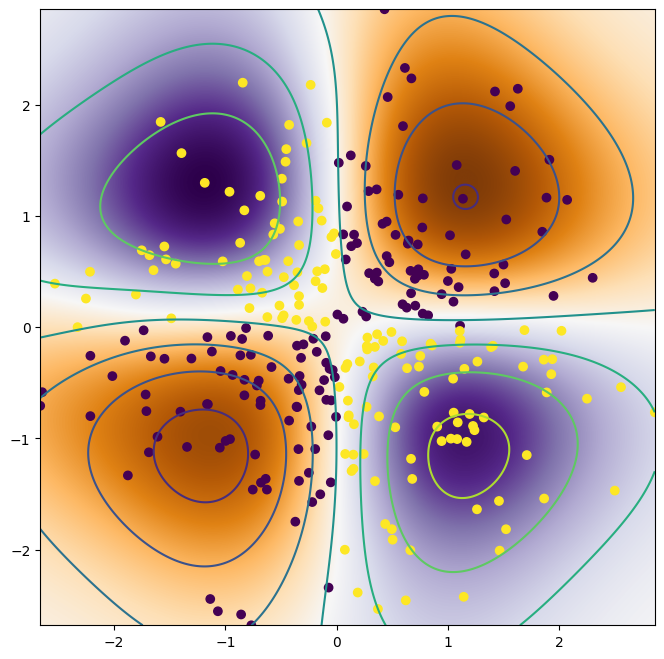

In [52]:
plt.figure(figsize=(8,8)) # 创建画布，并设置画布的大小
plt.contour(X,Y,distance.reshape(1000,1000))
plt.scatter(data[:,0],data[:,1],c=target)
plt.imshow(distance.reshape(1000,1000),cmap='PuOr_r',extent=[data[:,0].min(),data[:,0].max(),data[:,1].min(),data[:,1].max()])

## 使用多种和函数对iris数据集进行分类

In [53]:
from sklearn.datasets import load_iris

In [54]:
iris = load_iris()
data = iris.data[:,0:2]
target = iris.target

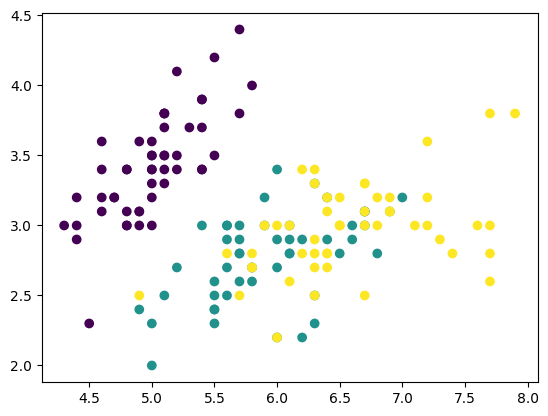

In [55]:
plt.scatter(data[:,0],data[:,1],c=target)

In [56]:
x = np.linspace(data[:,0].min(),data[:,0].max(),1000)
y = np.linspace(data[:,1].min(),data[:,1].max(),1000)
X,Y = np.meshgrid(x,y)
XY = np.c_[X.ravel(),Y.ravel()]

In [58]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(data,target)
y_linear = svc_linear.predict(XY)

In [59]:
from sklearn.svm import LinearSVC

In [60]:
svc_Linear = LinearSVC(max_iter=10000)
svc_Linear.fit(data,target)
y_Linear = svc_Linear.predict(XY)

In [61]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(data,target)
y_rbf = svc_rbf.predict(XY)

In [62]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(data,target)
y_poly = svc_poly.predict(XY)

Text(0.5, 1.0, 'poly')

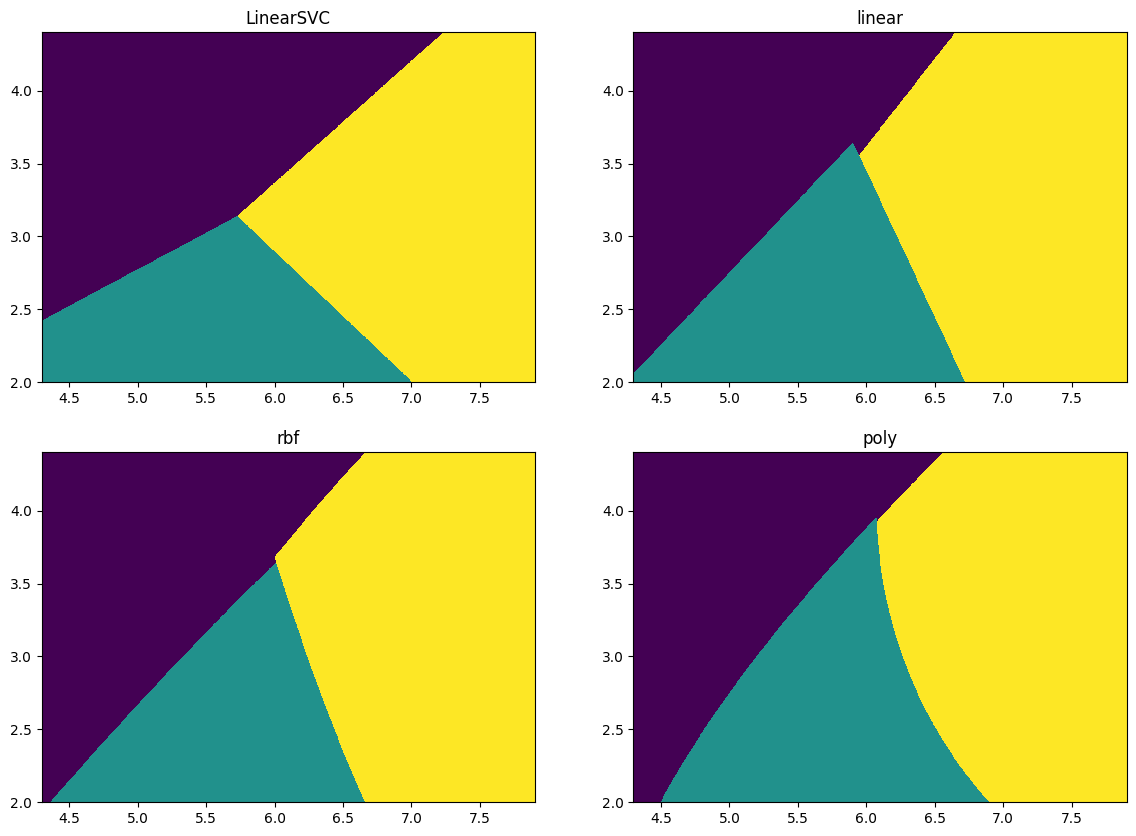

In [64]:
plt.figure(figsize=(2*7,2*5))

axes1 = plt.subplot(2,2,1)
axes1.pcolormesh(X,Y,y_Linear.reshape(1000,1000),shading='auto')
axes1.set_title('LinearSVC')

axes2 = plt.subplot(2, 2, 2)
axes2.pcolormesh(X, Y, y_linear.reshape(1000, 1000), shading='auto')
axes2.set_title('linear')

axes3 = plt.subplot(2, 2, 3)
axes3.pcolormesh(X, Y, y_rbf.reshape(1000, 1000), shading='auto')
axes3.set_title('rbf')

axes4 = plt.subplot(2, 2, 4)
axes4.pcolormesh(X, Y, y_poly.reshape(1000, 1000), shading='auto') #自动选择伪彩色的着色方式
axes4.set_title('poly')


## 使用SVM多种核函数进行回归

In [66]:
from sklearn.svm import SVR #SVR用于回归任务

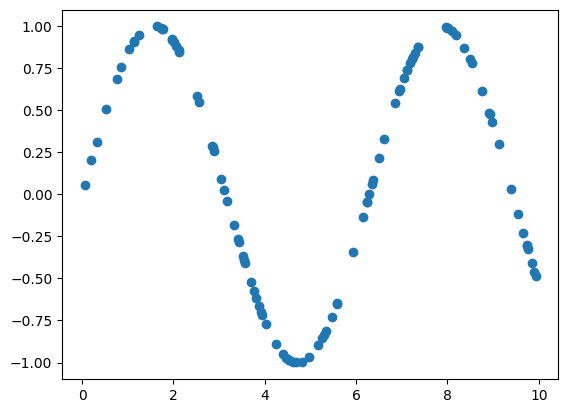

In [67]:
x = np.random.rand(100)*10
y=np.sin(x)
plt.scatter(x,y)

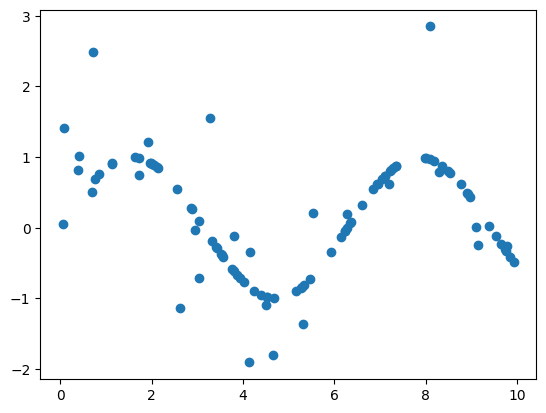

In [68]:
x[::4] +=np.random.randn(25)*0.6
y[::4]+=np.random.randn(25)*0.6
plt.scatter(x,y)

In [69]:
x

array([7.20243039, 6.14615319, 4.24240507, 4.5261584 , 1.72251658,
       6.95864412, 7.04801407, 7.35494227, 4.14043785, 1.97815428,
       6.94566796, 7.34873617, 9.77922498, 8.91733156, 9.65463403,
       5.1687806 , 0.42128789, 6.28273803, 9.39596855, 7.21962106,
       4.50707116, 6.23713531, 8.01745731, 2.13075115, 0.68945502,
       3.5619051 , 0.75715131, 4.02281826, 5.5440421 , 2.11482672,
       3.9409626 , 5.29257257, 3.29029536, 2.00962354, 4.52592051,
       6.85548187, 9.09854065, 4.6894054 , 8.18246982, 2.87876653,
       3.81443459, 1.13302686, 2.06187064, 3.04926973, 6.27087646,
       5.33583091, 6.34691864, 3.41263809, 2.94632609, 0.8537384 ,
       3.75725072, 7.24010852, 5.31785291, 9.75520912, 3.51932884,
       6.23779232, 2.6273516 , 5.46581539, 8.53018965, 3.32380502,
       4.66000792, 6.37013531, 5.26364654, 8.10028775, 0.08514475,
       1.96810573, 1.72846423, 9.84655213, 0.39121443, 7.11384109,
       9.73271153, 8.4952384 , 8.09217251, 0.05618766, 3.80446

In [70]:
x = x.reshape(-1,1)

In [71]:
x

array([[7.20243039],
       [6.14615319],
       [4.24240507],
       [4.5261584 ],
       [1.72251658],
       [6.95864412],
       [7.04801407],
       [7.35494227],
       [4.14043785],
       [1.97815428],
       [6.94566796],
       [7.34873617],
       [9.77922498],
       [8.91733156],
       [9.65463403],
       [5.1687806 ],
       [0.42128789],
       [6.28273803],
       [9.39596855],
       [7.21962106],
       [4.50707116],
       [6.23713531],
       [8.01745731],
       [2.13075115],
       [0.68945502],
       [3.5619051 ],
       [0.75715131],
       [4.02281826],
       [5.5440421 ],
       [2.11482672],
       [3.9409626 ],
       [5.29257257],
       [3.29029536],
       [2.00962354],
       [4.52592051],
       [6.85548187],
       [9.09854065],
       [4.6894054 ],
       [8.18246982],
       [2.87876653],
       [3.81443459],
       [1.13302686],
       [2.06187064],
       [3.04926973],
       [6.27087646],
       [5.33583091],
       [6.34691864],
       [3.412

In [72]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(x,y)

SVR(kernel='linear')

In [73]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x,y)

SVR()

In [74]:
svr_poly=SVR(kernel='poly')
svr_poly.fit(x,y)

SVR(kernel='poly')

In [75]:
x_test = np.linspace(0,30,100).reshape(-1,1)
y_linear = svr_linear.predict(x_test)
y_rbf = svr_rbf.predict(x_test)
y_poly = svr_poly.predict(x_test)

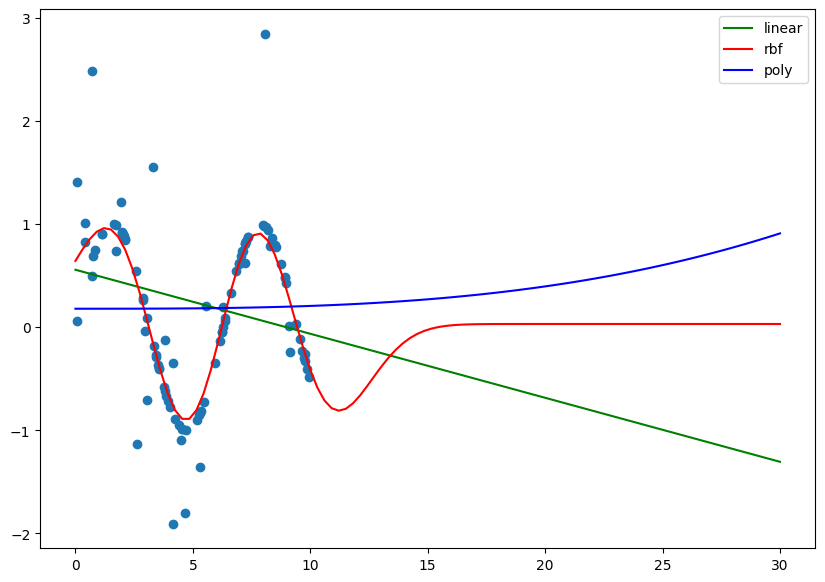

In [76]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.plot(x_test,y_linear,c='g',label='linear')
plt.plot(x_test,y_rbf,c='r',label='rbf')
plt.plot(x_test,y_poly,c='b',label='poly')
plt.legend()

# 作业

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV #网格搜索调参
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #标签编码，处理分类数据
from sklearn.metrics import accuracy_score #计算准确率
from scipy.io import loadmat  #读取.mat格式数据
import warnings
warnings.filterwarnings("ignore") #忽略运行中的警告信息

# Part 1 使用不同核对下面三个数据集进行分类，并画出分类边界

- ex6data1.mat
- ex6data2.mat
- ex6data3.mat


In [6]:
DATAPATH_1 = loadmat('data/SVM/ex6data1.mat')
DATAPATH_2 = loadmat('data/SVM/ex6data2.mat')
DATAPATH_3 = loadmat('data/SVM/ex6data3.mat')

In [9]:
#X:特征数据
#Y：标签数据
#xlabel，ylabel：x轴和y轴的标签
#pos_label,neg_label:两类数据点的图例名称
#xmin,xmax,ymin,ymax:坐标轴的表示范围
def plot_data(X,y,xlabel,ylabel,pos_label,neg_label,xmin,xmax,ymin,ymax,axes=None):
    plt.rcParams['figure.figsize']=(10,6)
    sns.set(style="whitegrid")

    pos = y[:,0]==1
    neg = y[:,0]==0

    if axes is None:
        axes = plt.gca()

    sns.scatterplot(x = X[pos][:,0],y=X[pos][:,1],marker='o',color='#003f5c',s=50,linewidth=2,label=pos_label,ax=axes)
    sns.scatterplot(x=X[neg][:,0],y=X[neg][:,1],marker='o',color='#ffa600',s=50,linewidth=2,label=neg_label,ax=axes)

    axes.set_xlim([xmin,xmax])
    axes.set_ylim([ymin,ymax])

    axes.set_xlabel(xlabel,fontsize=12)
    axes.set_ylabel(ylabel,fontsize=12)

    axes.legend(loc='upper right',fancybox=True)

In [10]:
data1 = DATAPATH_1
X=data1['X']
y = data1['y']

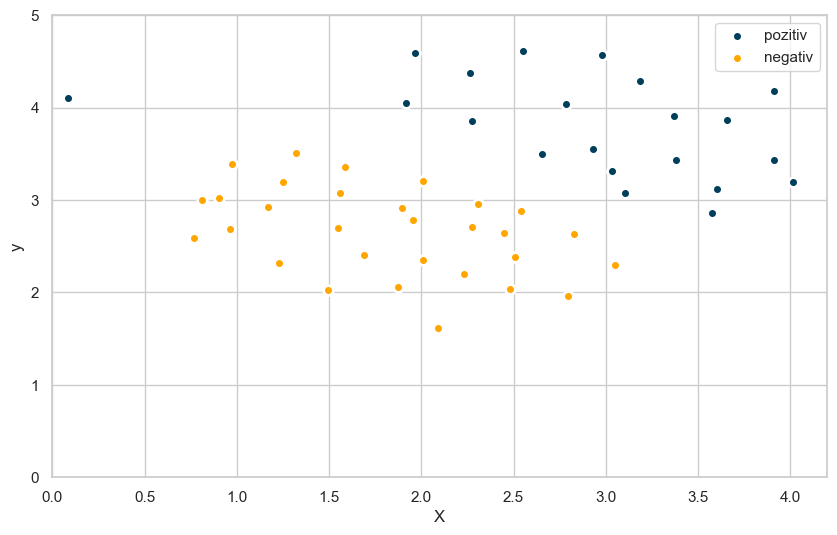

In [11]:
plot_data(X,y,'X','y','pozitiv','negativ',0,4.2,0,5)

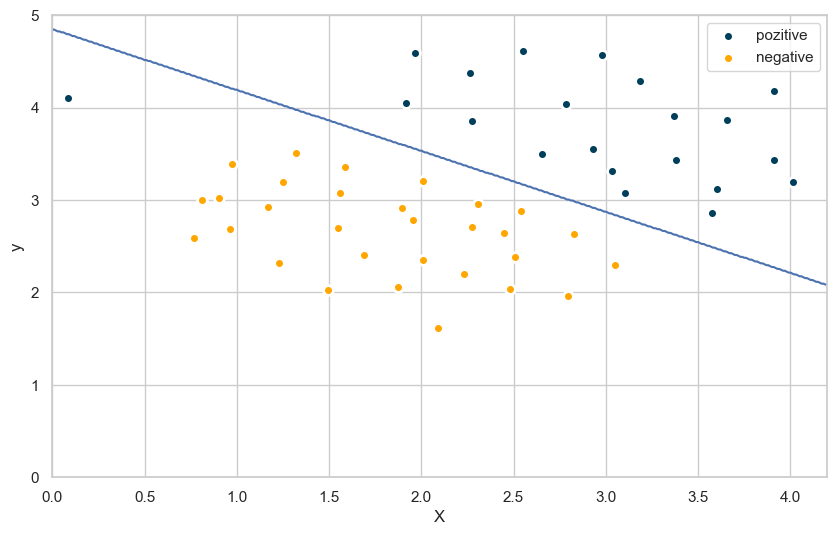

In [14]:
#C=1
clf = svm.SVC(kernel='linear',C=1,decision_function_shape='ovr') #采用一对多的策略适配多分类
clf.fit(X,y.ravel())

plot_data(X,y,'X','y','pozitive','negative',0,4.2,0,5)

x_1,x_2 = np.meshgrid(np.arange(0.0,5.0,0.01),np.arange(0.0,5.0,0.01))
Z = clf.predict(np.c_[x_1.ravel(),x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1,x_2,Z,[0.5],colors='b')

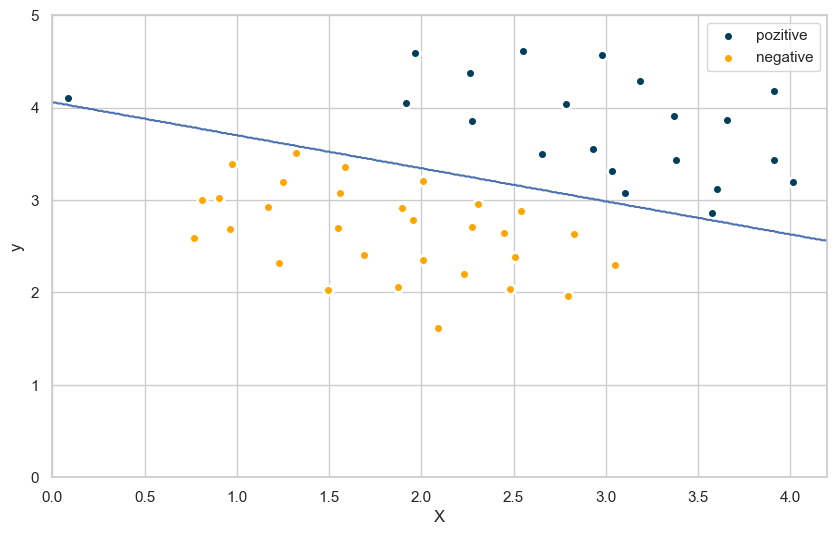

In [15]:
#C=100
clf = svm.SVC(kernel='linear',C=100,decision_function_shape='ovr') #采用一对多的策略适配多分类
clf.fit(X,y.ravel())

plot_data(X,y,'X','y','pozitive','negative',0,4.2,0,5)

x_1,x_2 = np.meshgrid(np.arange(0.0,5.0,0.01),np.arange(0.0,5.0,0.01))
Z = clf.predict(np.c_[x_1.ravel(),x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1,x_2,Z,[0.5],colors='b')

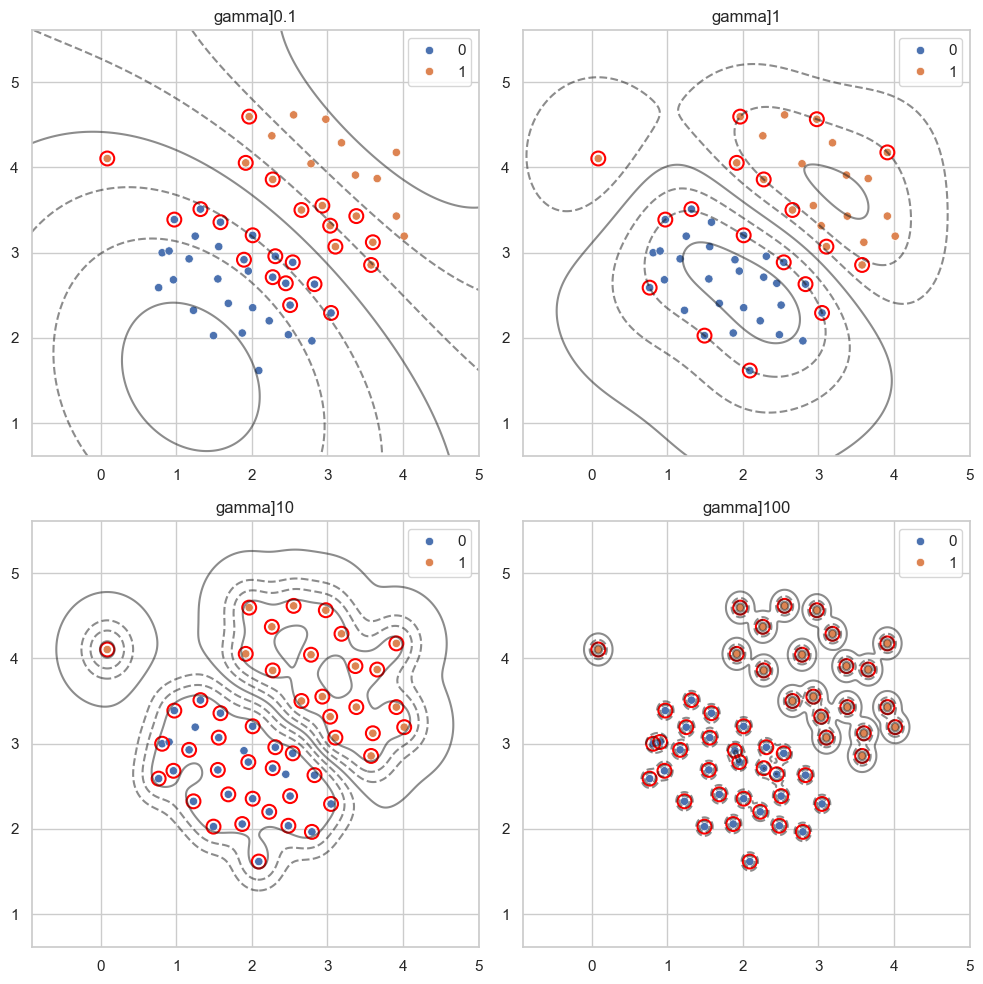

In [22]:
gammas=[0.1,1,10,100]
sns.set(style="whitegrid")

fig,axes=plt.subplots(2,2,figsize=(10,10))

#嵌套循环来填充子图
for i in range(2):
    for j in range(2):
        idx = i * 2 + j
        gamma = gammas[idx]

        clf = svm.SVC(kernel='rbf',gamma=gamma)
        clf.fit(X,y.ravel())

        sns.scatterplot(x=X[:,0].ravel(),y=X[:,1].ravel(),hue=y.ravel(),palette="deep",ax=axes[i,j])

        sns.scatterplot(x=clf.support_vectors_[:,0].ravel(),y=clf.support_vectors_[:,1].ravel(),color="none",edgecolor="red",marker="o",s=100,ax=axes[i,j],linewidth=1.5)

        x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
        y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
        xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
        Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        Z=Z.reshape(xx.shape)
        axes[i,j].contour(xx,yy,Z,colors='k',level=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])

        axes[i,j].set_title(f'gamma]{gamma}')

plt.tight_layout()
plt.show()

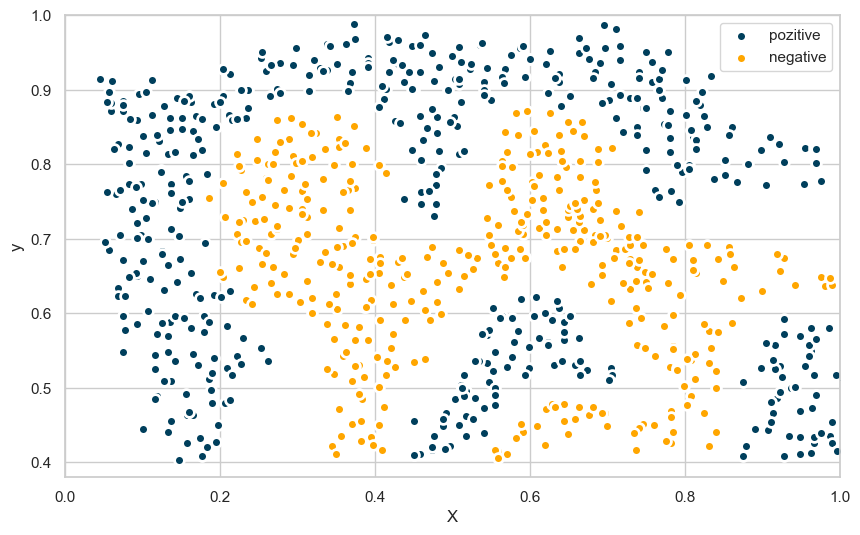

In [23]:
#绘制第二个数据的散点图
data2 = DATAPATH_2
X_2 = data2['X']
y_2 = data2['y']
plot_data(X_2, y_2, 'X', 'y', 'pozitive', 'negative', 0, 1.0, 0.38, 1)

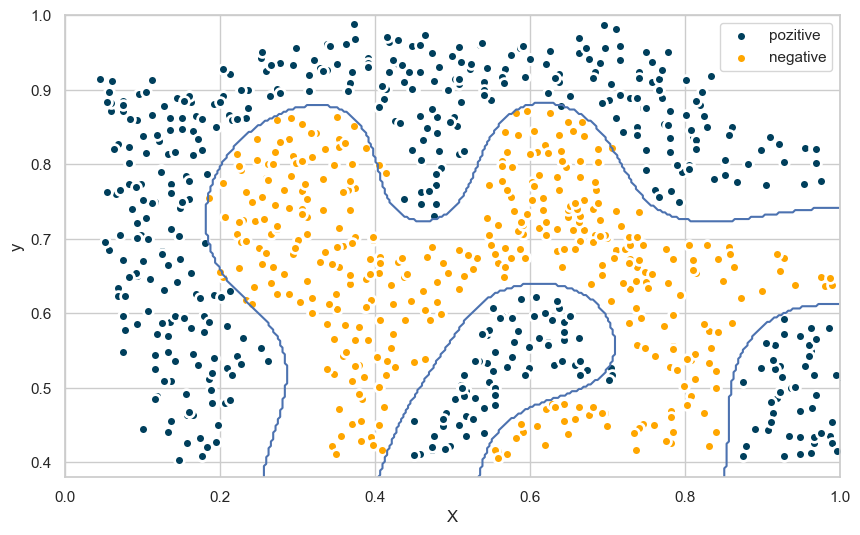

In [25]:
#上述情况适合使用高斯核函数
sigmma = 0.1
gamma = 1/(2*sigmma**2)
clfg = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
clfg.fit(X_2, y_2.ravel())

plot_data(X_2, y_2, 'X', 'y', 'pozitive', 'negative', 0, 1, 0.38, 1)

x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.003), np.arange(0.38, 1.0, 0.003))
Z = clfg.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

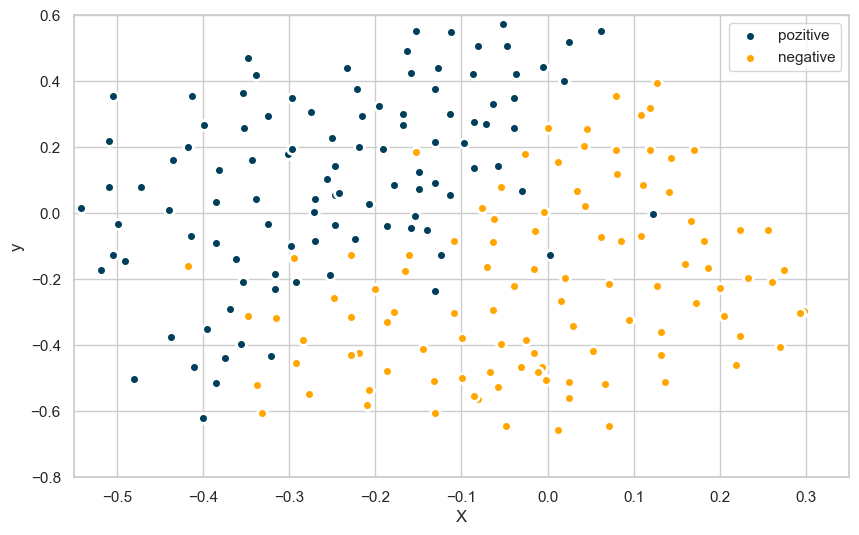

In [26]:
data3 = DATAPATH_3

X_3 = data3['X']
y_3 = data3['y']
# 绘制第三个数据的散点图
plot_data(X_3, y_3, 'X', 'y', 'pozitive', 'negative', -0.55, 0.35, -0.8, 0.6)

In [28]:
# 寻找合适的参数
sigma = [0.01,0.03,0.1,0.3,1,3,10,30]
C = [0.01,0.03,0.1,0.3,1,3,10,30]
errors=list()  #存储模型验证得分
sigma_c=list() #存储对应参数组合
for each in sigma:
    for each_c in C:
        clf = svm.SVC(kernel='rbf',gamma=1/(2*(each**2)),C=each_c,decision_function_shape='ovr')
        clf.fit(X_3,y_3.ravel())
        errors.append(clf.score(data3['Xval'],data3['yval'].ravel()))
        sigma_c.append((each,each_c))

In [29]:
index = np.argmax(errors)
sigma_max,c_max=sigma_c[index]
print('西格玛的最佳值是: {}'.format(sigma_max))
print('C 的最佳值为: {}'.format(c_max))

西格玛的最佳值是: 0.1
C 的最佳值为: 1


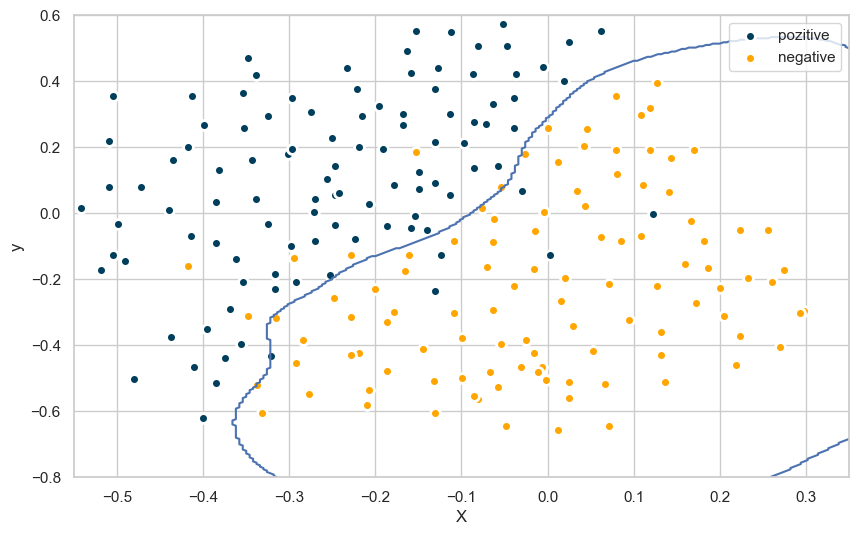

In [30]:
sigma= 0.1
gamma = 1/(2*(sigma**2))

optimal_clf = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
optimal_clf.fit(X_3, y_3.ravel())

plot_data(X_3, y_3, 'X', 'y', 'pozitive', 'negative', -0.55, 0.35, -0.8, 0.6)

x_1, x_2 = np.meshgrid(np.arange(-0.6, 0.4, 0.004), np.arange(-0.8, 0.6, 0.004))
Z = optimal_clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

# Part 2 使用SVC对cars.txt进行分析

这是一个关于汽车测评的数据集，类别变量为汽车的测评，（unacc，acc，good，vgood）分别代表（不可接受，可接受，好，非常好），而6个属性变量分别为「买入价」，「维护费」，「车门数」，「可容纳人数」，「后备箱大小」，「安全性」。值得一提的是6个属性变量全部是有序类别变量，比如「可容纳人数」值可为「2，4，more」，「安全性」值可为「low, med, high」

###  属性解释
    
|  属性   | 解释  |
|  :------  | :------   |
|  buying price|购买价格：很高, 高, 中, 低 | 
| maint(price of the maintenanc)e|维护费用：很高, 高, 中, 低| 
| doors|车门数量：2、3、4门、多门| 
| persons(capacity in terms of persons to carry)|汽车容纳人数：2人, 4人, 或更多人| 
| lug_boot(the size of luggage boot)|可容纳行李空间：小、中、大| 
| safety |安全性：低、中、高| 
| **Class(CAR car acceptability)**|汽车可接受度分等级：unacc, acc, good, vgood（不能接受、可以接受、好，很好）**目标变量**| 



In [31]:
car = pd.read_csv('data/SVM/cars.txt',header = None)
col_names=['buying','maint','doors','persions','lug_boot','safety','class']
car.columns = col_names

In [32]:
car.head()

,buying,maint,doors,persions,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [33]:
car.shape

(1728, 7)

In [34]:
car.describe()

,buying,maint,doors,persions,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [35]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persions  1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [36]:
car.isnull().sum()

buying      0
maint       0
doors       0
persions    0
lug_boot    0
safety      0
class       0
dtype: int64

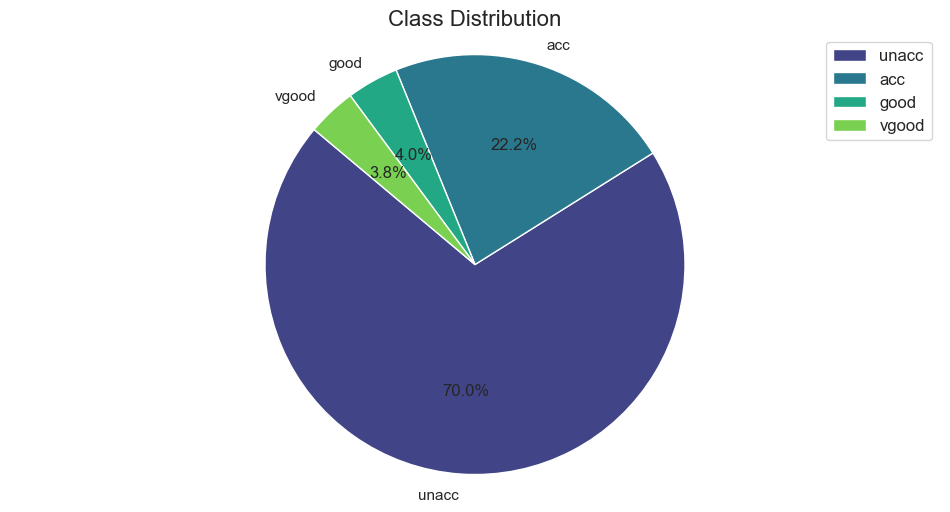

In [40]:
#计算每个类别的数量
class_counts = car['class'].value_counts()

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

pieplot = plt.pie(class_counts,labels=class_counts.index,autopct='%1.1f%%',startangle=140,colors=sns.color_palette("viridis",len(class_counts)))

plt.title('Class Distribution',fontsize=16)
legend=plt.legend(class_counts.index,loc='upper right',fontsize=12)
for text in legend.get_texts():
    text.set_fontsize(12)

plt.axis('equal')
plt.rcParams['font.size']=12
plt.show()

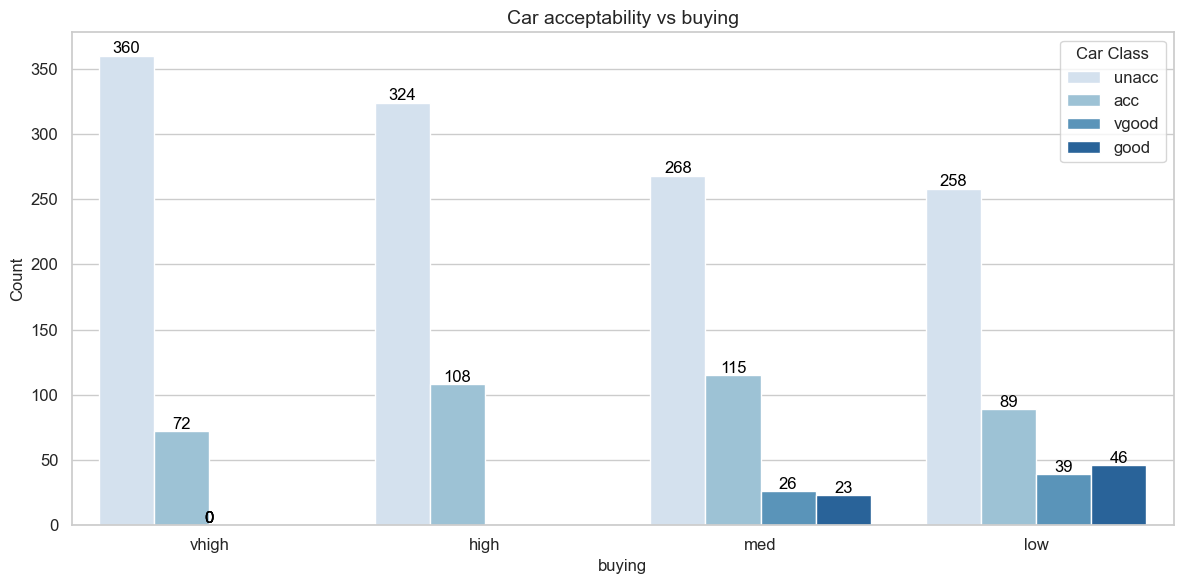

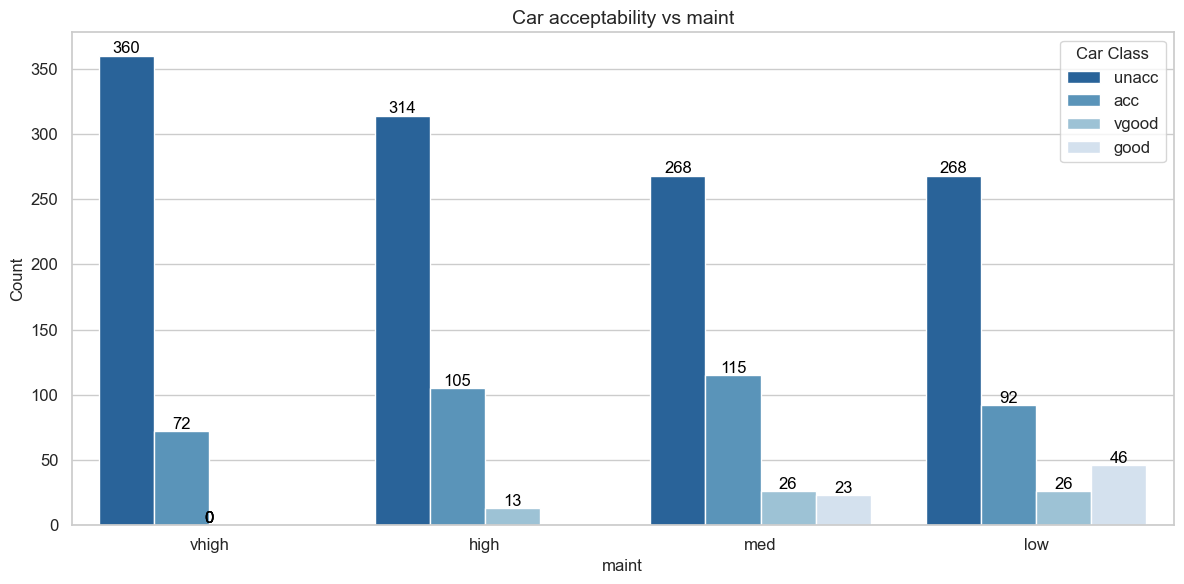

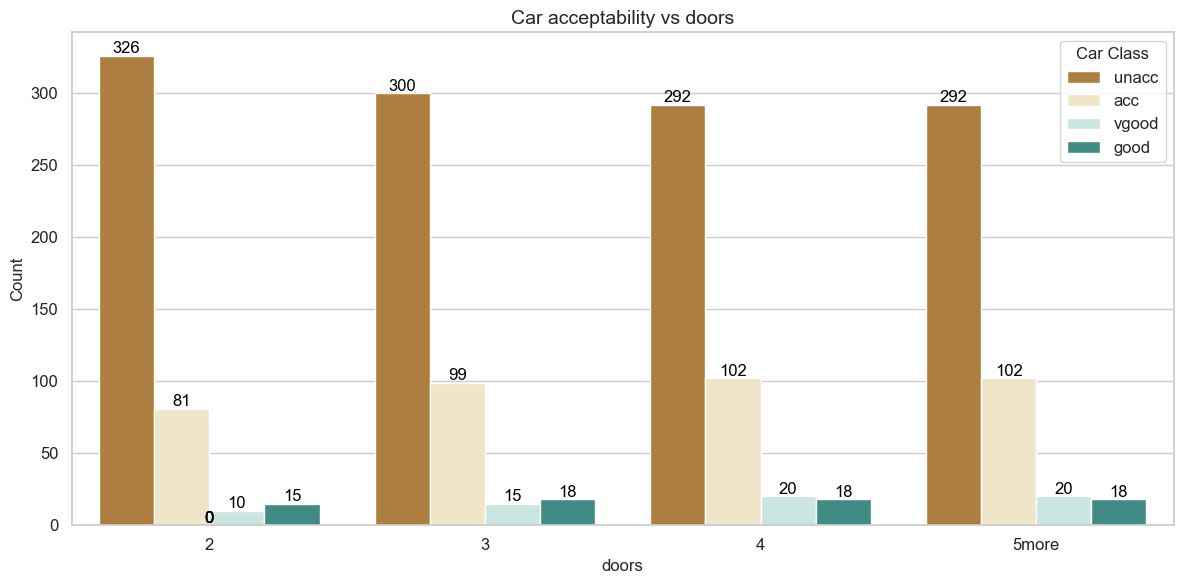

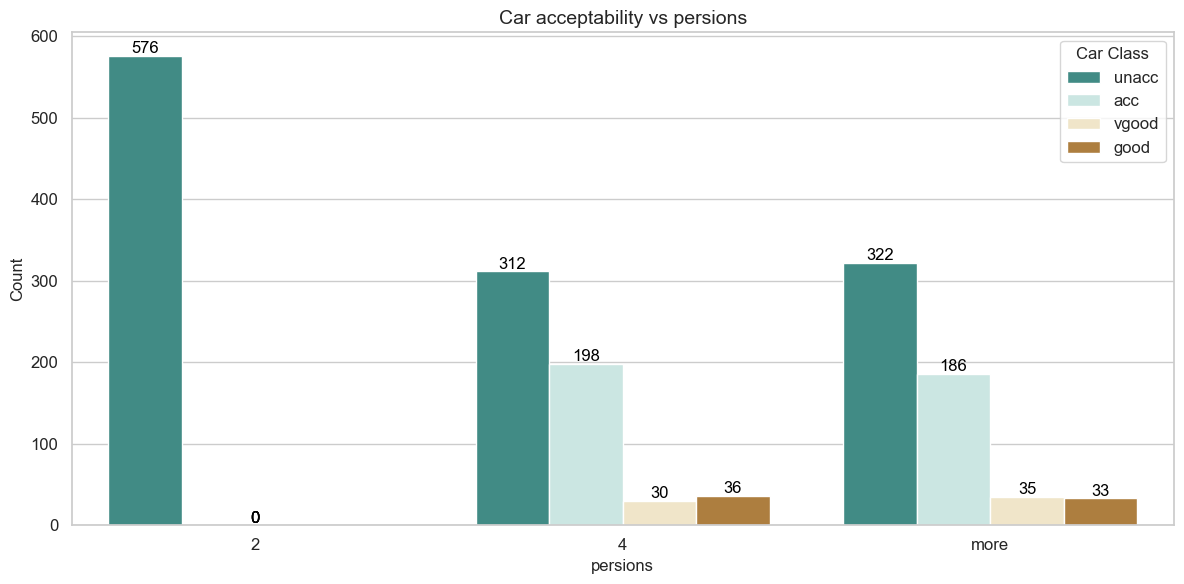

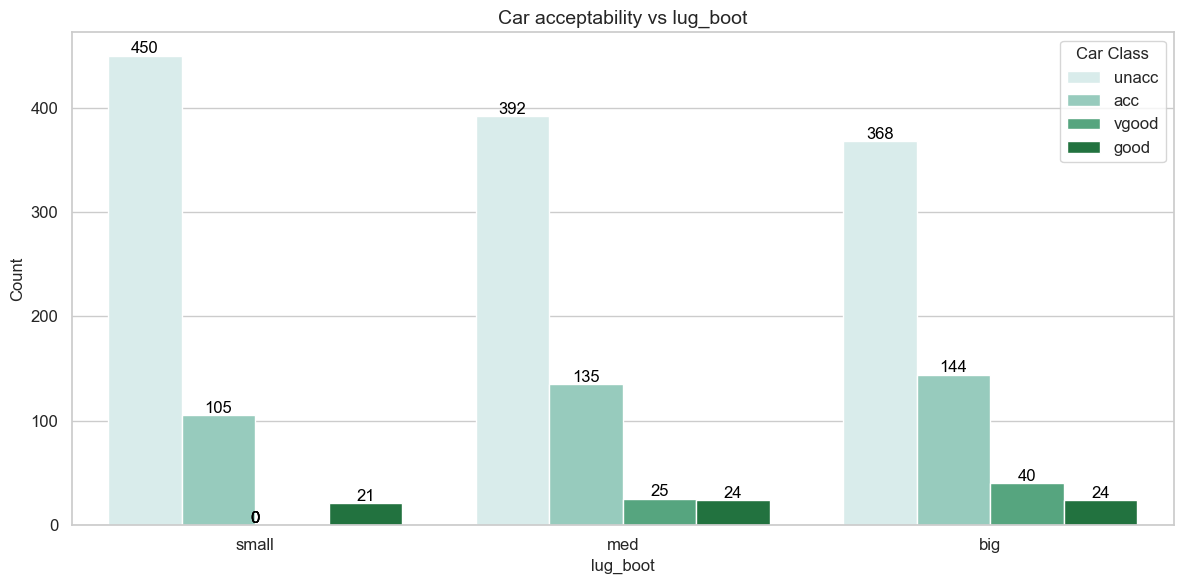

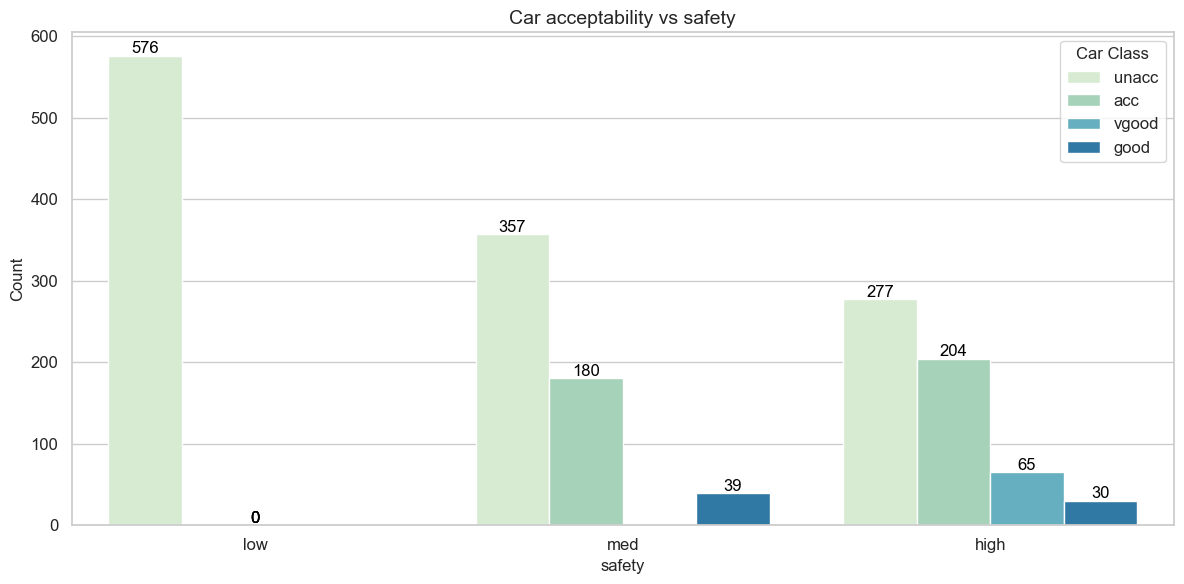

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # 需确保导入pandas（假设car是DataFrame）

# 颜色主题列表
palette_themes = ["Blues", "Blues_r", "BrBG", "BrBG_r", "BuGn", "GnBu"]

# 循环遍历数据框中的每一列（除最后一列）
for i, col in enumerate(car.columns[:-1]):
    # 1. 创建画布
    plt.figure(figsize=(12, 6))
    # 2. 设置标题
    plt.title("Car acceptability vs %s" % col, fontsize=14)  # 可额外调整标题字号
    
    # 3. 循环分配颜色主题
    palette_theme = palette_themes[i % len(palette_themes)]
    
    # 4. 绘制计数图（删除死循环while！）
    fig2 = sns.countplot(
        x=car[col], 
        hue=car['class'], 
        palette=palette_theme  # 显式指定调色板（原代码未显式传，可能用默认色，修复后确保用指定主题）
    )
    
    # 5. 调整坐标轴样式
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # 调整横轴标签（若特征值过长，可旋转避免重叠）
    plt.xlabel(col, fontsize=12)  # 显式设置横轴标签（原代码缺失，补充后更清晰）
    plt.ylabel("Count", fontsize=12)  # 显式设置纵轴标签（表示“计数”）
    
    # 6. 调整图例
    plt.legend(title='Car Class', loc='upper right', fontsize=12, title_fontsize=12)
    
    # 7. 为柱子添加数值标注
    for p in fig2.patches:
        fig2.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width()/2., p.get_height()),
            ha='center', va='center',
            fontsize=12, color='black',
            xytext=(0, 5), textcoords='offset points'
        )
    
    # 8. 显示图表（避免重叠）
    plt.tight_layout()  # 自动调整布局，防止标签被截断
    plt.show()

buying 编码映射：{'high': np.int64(0), 'low': np.int64(1), 'med': np.int64(2), 'vhigh': np.int64(3)}
maint 编码映射：{'high': np.int64(0), 'low': np.int64(1), 'med': np.int64(2), 'vhigh': np.int64(3)}
doors 编码映射：{'2': np.int64(0), '3': np.int64(1), '4': np.int64(2), '5more': np.int64(3)}
persions 编码映射：{'2': np.int64(0), '4': np.int64(1), 'more': np.int64(2)}
lug_boot 编码映射：{'big': np.int64(0), 'med': np.int64(1), 'small': np.int64(2)}
safety 编码映射：{'high': np.int64(0), 'low': np.int64(1), 'med': np.int64(2)}
class 编码映射：{'acc': np.int64(0), 'good': np.int64(1), 'unacc': np.int64(2), 'vgood': np.int64(3)}


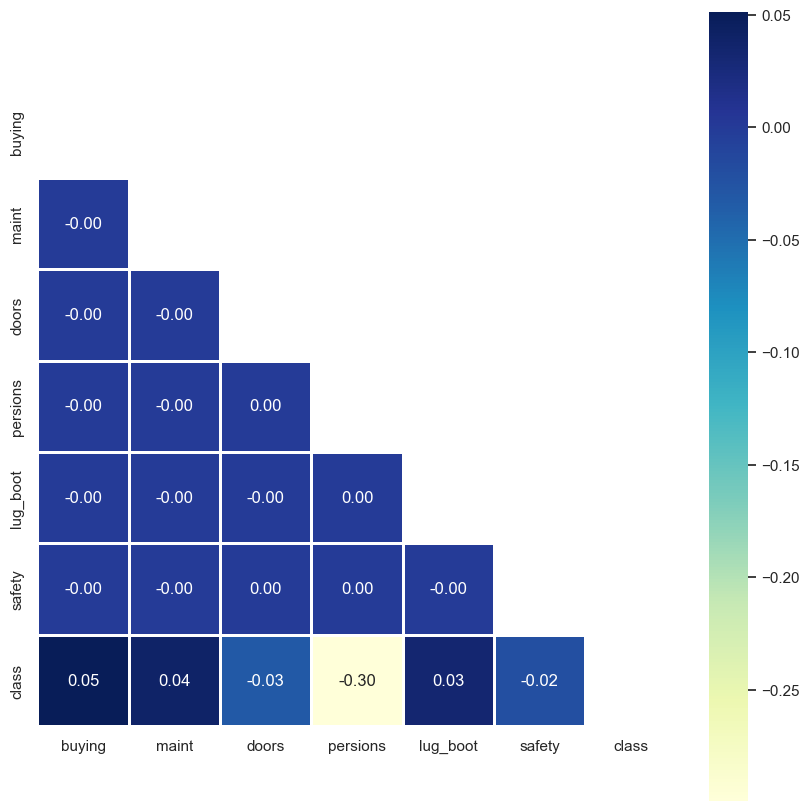

In [52]:
from sklearn.preprocessing import LabelEncoder

# 1. 复制数据
car_encoded = car.copy()

# 2. 对每个字符串列应用LabelEncoder
le = LabelEncoder()
for col in car_encoded.columns:
    if car_encoded[col].dtype == 'object':  # 仅对字符串列编码
        car_encoded[col] = le.fit_transform(car_encoded[col])
        # 查看编码映射（可选，确认顺序是否符合预期）
        print(f"{col} 编码映射：{dict(zip(le.classes_, le.transform(le.classes_)))}")

# 3. 计算相关性
corr = car_encoded.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
    ax = sns.heatmap(corr, mask=mask, square=True, linewidths=.8, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

In [55]:
# 变换数据
categorical = ['buying','maint','doors','persions','lug_boot','safety','class']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(car[col])
    car[col] = label_encoder.transform(car[col]) #将分类值转化为整数

In [56]:
X = car.drop('class',axis=1)
y=car['class']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [61]:
svc = SVC()

In [63]:
# 网格搜索
parameters = [ {'C':[0.5, 1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[0.5, 1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[0.5, 1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)  #关闭了详细日志

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.5, 1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [0.5, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [65]:
print('GridSearch CV 最佳分数为：{:.4f}\n\n'.format(grid_search.best_score_))
print('最佳结果的参数是：','\n\n',(grid_search.best_params_))

GridSearch CV 最佳分数为：0.9942


最佳结果的参数是： 

 {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [66]:
print('GridSearch CV 在SVM上测试集的分数为: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV 在SVM上测试集的分数为: 1.0000
